In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# to build linear regression_model
from sklearn.linear_model import LinearRegression
# to import data set
from sklearn.datasets import data, make_regression
# to check error and score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# to split the data into train and test
from sklearn.model_selection import train_test_split
# to scale the data
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [2]:
housing= pd.read_csv('./USA_Housing-1 (1).csv')
housing.head()
housing.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Avg. Area Income,5000.0,NaN,NaN,NaN,68583.108984,10657.991214,17796.63119,61480.562388,68804.286404,75783.338666,107701.748378
Avg. Area House Age,5000.0,NaN,NaN,NaN,5.977222,0.991456,2.644304,5.322283,5.970429,6.650808,9.519088
Avg. Area Number of Rooms,5000.0,NaN,NaN,NaN,6.987792,1.005833,3.236194,6.29925,7.002902,7.665871,10.759588
Avg. Area Number of Bedrooms,5000.0,NaN,NaN,NaN,3.98133,1.234137,2.0,3.14,4.05,4.49,6.5
Area Population,5000.0,NaN,NaN,NaN,36163.516039,9925.650114,172.610686,29403.928702,36199.406689,42861.290769,69621.713378
Price,5000.0,NaN,NaN,NaN,1232072.654142,353117.626581,15938.657923,997577.135049,1232669.377966,1471210.204212,2469065.594175
Address,5000,5000,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Avg. Area Income ranges from 17796.6 to 107701.748378
- Avg. Area House ranges from Age 2.6 to 9.5
- Avg. Area Number of Rooms ranges from 3.2 to 10.8
- Avg. Area Number of Bedrooms ranges from 2.0 to 6.5
- Area Population ranges from 172.6 to 69621.7
- Price ranges from 15938.7 to 2469065.6
- Address has 5000 unique value which implies that we have 5000 different addresses

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


- There are only one categorical variables thats is Address while other varaibles are numerical.
- There are 5000 rows and 7 columns in the data set.

In [4]:
housing.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

- There are no missing value in the data.

In [5]:
housing.duplicated().sum()

0

- There are no duplicate value in the data.

In [6]:
housing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [7]:
housing.Address

0       208 Michael Ferry Apt. 674\nLaurabury, NE 3701...
1       188 Johnson Views Suite 079\nLake Kathleen, CA...
2       9127 Elizabeth Stravenue\nDanieltown, WI 06482...
3                               USS Barnett\nFPO AP 44820
4                              USNS Raymond\nFPO AE 09386
                              ...                        
4995                     USNS Williams\nFPO AP 30153-7653
4996                PSC 9258, Box 8489\nAPO AA 42991-3352
4997    4215 Tracy Garden Suite 076\nJoshualand, VA 01...
4998                            USS Wallace\nFPO AE 73316
4999    37778 George Ridges Apt. 509\nEast Holly, NV 2...
Name: Address, Length: 5000, dtype: object

## **Univariate Analysis**
- We wont be considering the categorical variables here because the only categorical variable has 5000 unique values.

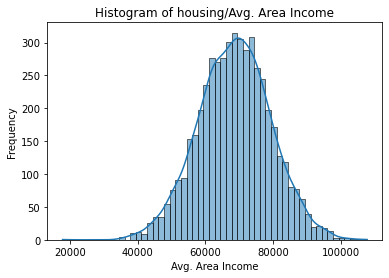

In [8]:
sns.histplot(data=housing, x='Avg. Area Income', kde=True)
plt.xlabel('Avg. Area Income')
plt.ylabel('Frequency')
plt.title('Histogram of housing/Avg. Area Income')
plt.show()

- Avg. Area Income has a normal distribution since the mean is close to the median in value

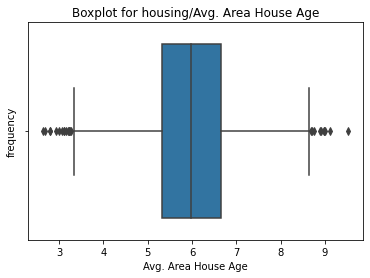

In [9]:
sns.boxplot(data=housing, x='Avg. Area House Age')
plt.xlabel('Avg. Area House Age')
plt.ylabel('frequency')
plt.title('Boxplot for housing/Avg. Area House Age')
plt.show()

- Avg. Area House Age has a normal distribution since the mean is close to the median in value
- There are some outlier for both lower and upper values

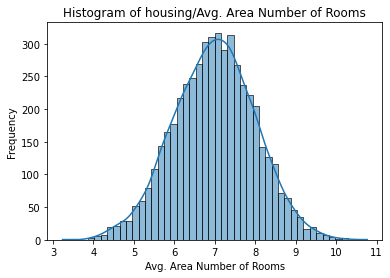

In [10]:
sns.histplot(data=housing, x='Avg. Area Number of Rooms', kde=True)
plt.xlabel('Avg. Area Number of Rooms')
plt.ylabel('Frequency')
plt.title('Histogram of housing/Avg. Area Number of Rooms')
plt.show()

- Avg. Area Number of Rooms has a normal distribution since the mean is close to the median in value

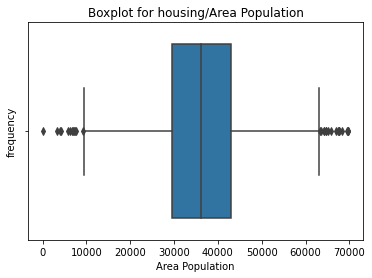

In [11]:
sns.boxplot(data=housing, x='Area Population')
plt.xlabel('Area Population')
plt.ylabel('frequency')
plt.title('Boxplot for housing/Area Population')
plt.show()

- Area population has a normal distribution since the mean is close to the median in value.
- There are some outlier for both lower and upper values.

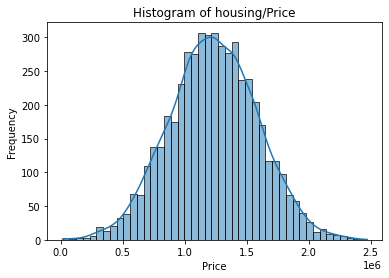

In [12]:
sns.histplot(data=housing, x='Price', kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of housing/Price')
plt.show()

- Price has a normal distribution since the mean is close to the median in value

In [13]:
new_house=housing.drop('Address', axis=1)
new_house
# Address is to be dropped because we can't turn it into dummies due to its content 
# it has a unique number that is equal to the entire row of that column(5000)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


# ***Bivariate Analysis***

- We wont be considering the categorical variables in this data for our Bivariate Analysis

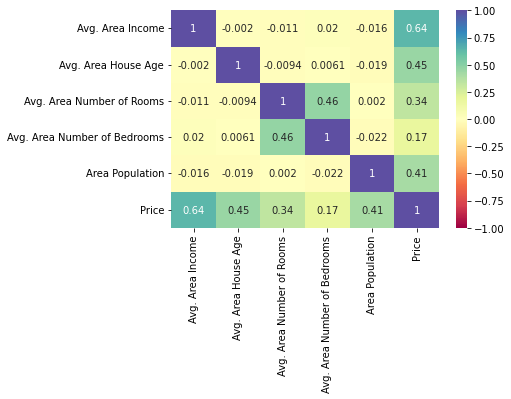

In [14]:
#We want to know the correlation between the parameters after address is dropped
corr_mat=new_house[new_house.columns].corr()
corr_mat
plt.figure()
sns.heatmap(data = corr_mat, annot = True, vmin = -1, vmax = 1, cmap = 'Spectral');

- Price and Avg. Area Income are highly positively corellated.
- Price are moderately positively correlated to Avg. Area House Age, Avg Area Number of Rooms and Area Population.
- other variables aside from price are lowly negatively correlated.


# Relationship between price and other parameters

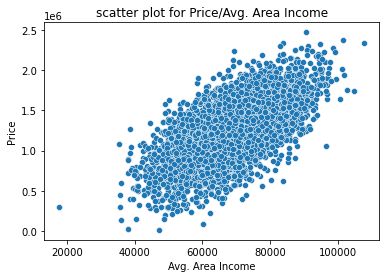

In [15]:
sns.scatterplot(data=new_house, x='Avg. Area Income', y='Price')
plt.xlabel('Avg. Area Income')
plt.ylabel('Price')
plt.title('scatter plot for Price/Avg. Area Income')
plt.show()

- The more the Avg. Area Income,the higher the price of the house
- Though not having greater impact on the distribution, there are outliers 
- The average area income earner that have interest in purchasing a house is from 40,000 income. 

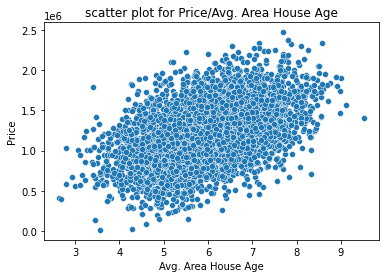

In [16]:
sns.scatterplot(data=new_house, x='Avg. Area House Age', y='Price')
plt.xlabel('Avg. Area House Age')
plt.ylabel('Price')
plt.title('scatter plot for Price/Avg. Area House Age')
plt.show()

- The more the Average Area House Age, the higher the price of the house
- Though not having greater impact on the distribution, there are outliers

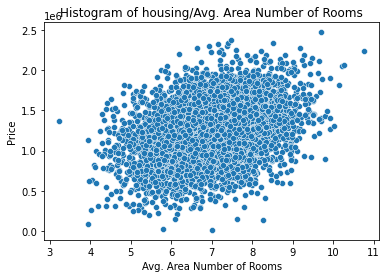

In [17]:
sns.scatterplot(data=housing, x='Avg. Area Number of Rooms', y='Price')
plt.xlabel('Avg. Area Number of Rooms')
plt.ylabel('Price')
plt.title('Histogram of housing/Avg. Area Number of Rooms')
plt.show()

- The more the Average Area Number of Rooms, the higher the price of the house
- Though not having greater impact on the distribution, there are outliers

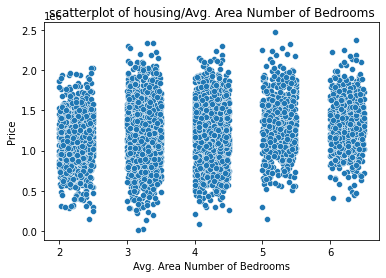

In [18]:
sns.scatterplot(data=housing, x='Avg. Area Number of Bedrooms', y='Price')
plt.xlabel('Avg. Area Number of Bedrooms')
plt.ylabel('Price')
plt.title('scatterplot of housing/Avg. Area Number of Bedrooms')
plt.show()

- There is no impact on the Average Area number of bedroom on the price of the house in that area.d
- Regardless of the number od rooms in the selected area, prices of houses increase.

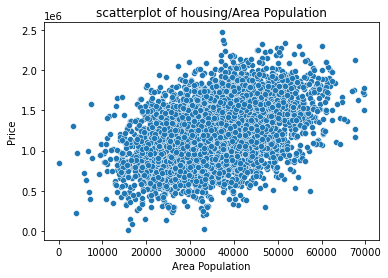

In [19]:
sns.scatterplot(data=housing, x='Area Population', y='Price')
plt.xlabel('Area Population')
plt.ylabel('Price')
plt.title('scatterplot of housing/Area Population')
plt.show()

- The more the Area Population, the higher the price of the house.


## ***We have earlier confirmed that there are no missing or duplicate data in the data provided, we can now build model with the data***

In [20]:
x=new_house.drop("Price", axis=1)
x
y=new_house["Price"]
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

In [21]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=0)
# Splitting the data into test and train

In [22]:
scaler= StandardScaler()
x_train_sd= scaler.fit_transform(x_train)
x_test_sd= scaler.transform(x_test)
#Standarding the data using Standard Scaler

In [23]:
lreg= LinearRegression()
lreg.fit(x_train_sd, y_train)
lreg.coef_
for index, col_name in enumerate(x.columns):
    print(f'{col_name} has coefficient {lreg.coef_[index]}')

Avg. Area Income has coefficient 230245.7250049588
Avg. Area House Age has coefficient 165031.99098952312
Avg. Area Number of Rooms has coefficient 122210.06746545529
Avg. Area Number of Bedrooms has coefficient 2173.6884382476837
Area Population has coefficient 149669.76854912352


In [24]:
lreg.fit(x_test_sd, y_test)

LinearRegression()

In [25]:
lreg.coef_
for index, col_name in enumerate(x.columns):
    print(f'{col_name} has coefficient {lreg.coef_[index]}')

Avg. Area Income has coefficient 228922.71823878915
Avg. Area House Age has coefficient 163407.7009047744
Avg. Area Number of Rooms has coefficient 121101.73336588747
Avg. Area Number of Bedrooms has coefficient 1666.6381239662858
Area Population has coefficient 150818.19919184988


- For one unit change in the value of Average Area Income will leads to 228,923 times impact on the Price of the house
- For one unit change in the value of Average Area House Age will leads to 163,408 times impact on the Price of the house
- For one unit change in the value of Average Area Number of Rooms will leads to 121,102 times impact on the Price of the house
- For one unit change in the value of Average Area Number of Bedrooms will leads to 1667 times impact on the Price of the house
- For one unit change in the value of Area Population will leads to 150818 times impact on the Price of the house

In [26]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, target, predictions):
    r2 = r2_score(target, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
        },
        index=[0],
    )

    return df_perf


In [27]:
model_performance_regression(lreg, x_train_sd, y_train)

,RMSE,MAE,R-squared,Adj. R-squared
0,100887.261944,81320.383079,0.917007,0.916888


In [28]:
model_performance_regression(lreg, x_test_sd, y_test)

,RMSE,MAE,R-squared,Adj. R-squared
0,101632.214565,81541.334404,0.920139,0.919872


Observations
- The model generalized well both on the train and test model.
- Root Mean Squared Error of test data is slightly higher than the train data.
- Mean Absolute Errorof test data is slightly higher than the train data.
- The units of both RMSE and MAE are the same.
- 91% performnace in both train and test model indicates that data generalizes well.


In [29]:
#We will try using the Lasso regression to check this.
from sklearn.linear_model import Ridge
ridge= Ridge()
ridge.fit(x_train_sd, y_train)

Ridge()

In [30]:
ridge.coef_
for index, col_name in enumerate(x.columns):
    print(f'{col_name} has coefficient {ridge.coef_[index]}')

Avg. Area Income has coefficient 230176.71170042112
Avg. Area House Age has coefficient 164981.97204852686
Avg. Area Number of Rooms has coefficient 122162.07329035665
Avg. Area Number of Bedrooms has coefficient 2195.74830862311
Area Population has coefficient 149625.9006092211


- ***The Ridge and Lasso method of improving the model will have any impact on the model since non of the parameters is close to Zero or near to zero.***